In [15]:
import sklearn
import urllib.request

In [3]:
import os

datapath = os.path.join("datasets", "lifesat", "")

In [5]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
os.makedirs(datapath, exist_ok=True)

for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
    urllib.request.urlretrieve(url, datapath + filename)

In [7]:
import pandas as pd

In [8]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"] == "TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)

    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))

    return full_country_stats[["GDP per capita", "Life satisfaction"]].iloc[keep_indices]

In [9]:
import matplotlib.pyplot as plt

In [10]:
import numpy as np

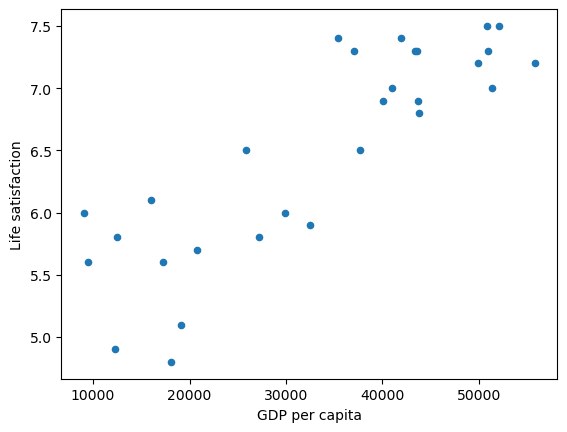

In [13]:
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=",")
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv", thousands=",", delimiter="\t",
                             encoding="latin1", na_values="n/a")

country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)

X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

country_stats.plot(kind='scatter', x="GDP per capita", y="Life satisfaction")

plt.show()

In [16]:
from sklearn import linear_model

In [17]:
model = linear_model.LinearRegression()

model.fit(X, y)

t0, t1 = model.intercept_[0], model.coef_[0][0]

$y = ax + b$

In [18]:
t0

4.853052800266436

In [19]:
t1

4.911544589158484e-05

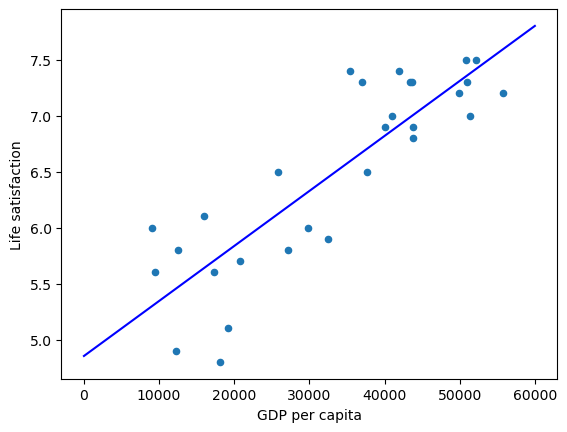

In [20]:
country_stats.plot(kind='scatter', x="GDP per capita", y="Life satisfaction")

X = np.linspace(0, 60000, 1000)
plt.plot(X, t0 + t1*X, "b")

plt.show()

In [21]:
X_new = [[22587]]

model.predict(X_new)

array([[5.96242338]])